In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from datetime import timedelta

**Чтение исходных данных**

In [2]:
raw_data = pd.read_csv('./TAXI DATA/arg_data.csv', sep = ';')
raw_data.set_index('dt', inplace=True)
raw_data.index = pd.to_datetime(raw_data.index)
raw_data.head()

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
dt,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Подготовка исходных данных**

Проведем отбор 102 регионов по майскому набору данных

In [3]:
data_may = raw_data.loc['2016-05-01 00:00:00':'2016-05-31 23:00:00', :]
(data_may.mean()>5).sum()

102

Отфильтруем общий датасет

In [4]:
intresting_columns = data_may.loc[:, data_may.mean()>5].columns
filtered_data = raw_data.loc[:, raw_data.columns.str.contains('|'.join(intresting_columns))]
filtered_data.head(2)

,1074,1075,1076,1124,1125,1126,1127,1128,1129,1130,...,1629,1683,1732,1733,1782,2067,2068,2117,2118,2167
dt,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,80.0,144.0,50.0,77.0,319.0,402.0,531.0,617.0,846.0,267.0,...,12.0,0.0,2.0,44.0,5.0,41.0,4.0,70.0,7.0,66.0
2016-01-01 01:00:00,91.0,211.0,49.0,134.0,404.0,420.0,370.0,453.0,594.0,224.0,...,29.0,0.0,5.0,2.0,2.0,4.0,0.0,47.0,1.0,29.0


Исправим нумерацию регионов. (Нумерация сместилась где-то в первых неделях. Создало проблему при добавлении решения на kaggle)

In [5]:
new_columns_names = [str(int(item)+1) for item in filtered_data.columns]

In [6]:
filtered_data.columns = new_columns_names 

In [7]:
filtered_data.head()

,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
dt,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,80.0,144.0,50.0,77.0,319.0,402.0,531.0,617.0,846.0,267.0,...,12.0,0.0,2.0,44.0,5.0,41.0,4.0,70.0,7.0,66.0
2016-01-01 01:00:00,91.0,211.0,49.0,134.0,404.0,420.0,370.0,453.0,594.0,224.0,...,29.0,0.0,5.0,2.0,2.0,4.0,0.0,47.0,1.0,29.0
2016-01-01 02:00:00,90.0,146.0,23.0,110.0,393.0,425.0,313.0,366.0,377.0,138.0,...,47.0,0.0,3.0,0.0,4.0,0.0,0.0,69.0,1.0,14.0
2016-01-01 03:00:00,32.0,87.0,16.0,62.0,252.0,399.0,324.0,309.0,327.0,166.0,...,46.0,0.0,2.0,4.0,5.0,1.0,0.0,21.0,0.0,9.0
2016-01-01 04:00:00,24.0,43.0,10.0,53.0,145.0,254.0,264.0,333.0,318.0,145.0,...,43.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,1.0,6.0


**Генерация общих признаков**

Под общими я подразумеваю универсальные признаки для любого id

In [8]:
data = filtered_data.copy()

In [9]:
# месяц, день месяца, день недели, чаc
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['day of week'] = data.index.dayofweek
data['hour'] = data.index.hour

# годовые, месячные и суточные признаки Фурье
K = 15
year_period = 8766 #365.2424*24 - средняя продолжительность года в часах
week_period = 168
day_period = 24
for i in range(1, K+1):
    data['y_с_' + str(i)] = np.cos(np.arange(1, data.shape[0]+1)*2*np.pi*i/year_period)
    data['y_s_' + str(i)] = np.sin(np.arange(1, data.shape[0]+1)*2*np.pi*i/year_period)
for i in range(1, K+1):    
    data['w_с_' + str(i)] = np.cos(np.arange(1, data.shape[0]+1)*2*np.pi*i/week_period)
    data['w_s_' + str(i)] = np.sin(np.arange(1, data.shape[0]+1)*2*np.pi*i/week_period)
for i in range(1, K+1):    
    data['d_с_' + str(i)] = np.cos(np.arange(1, data.shape[0]+1)*2*np.pi*i/day_period)
    data['d_s_' + str(i)] = np.sin(np.arange(1, data.shape[0]+1)*2*np.pi*i/day_period)   

**Создание регрессионных моделей для каждого региона**

In [11]:
%%time

import warnings
warnings.filterwarnings('ignore')

linear_models_dict = {}

X_val_dict = {}
y_val_dict = {}
y_val_pred_dict = {}

X_test_dict = {}
y_test_dict = {}
y_test_pred_dict = {}

for id_name in filtered_data.columns:
    print (id_name)
    drop_list = list(filtered_data.columns)
    drop_list.remove(str(id_name))
    named_data = data.copy().drop(drop_list, axis = 1) #Избавляемся от лишних id на итерации
    
    #Добавляем shift признаки
    named_data['shift_1'] = named_data[str(id_name)].shift(1)
    named_data['shift_2'] = named_data[str(id_name)].shift(2)
    named_data['shift_3'] = named_data[str(id_name)].shift(3)
    named_data['shift_4'] = named_data[str(id_name)].shift(4)
    named_data['shift_5'] = named_data[str(id_name)].shift(5)
    named_data['shift_6'] = named_data[str(id_name)].shift(6)
    named_data['shift_24'] = named_data[str(id_name)].shift(24)
    named_data['shift_48'] = named_data[str(id_name)].shift(48)
    
    named_data = named_data.iloc[48:]
    
    # Разбиение данных
    predict_may_start = '2016-04-30 23:00'
    predict_may_stop = '2016-05-31 23:00'
    precit_june_stop = '2016-06-30 23:00' # df и так заканчивается этим числом
    
    X_train = named_data.loc[:predict_may_start].drop(str(id_name), axis = 1)
    y_train = named_data.loc[:predict_may_start][str(id_name)]
    
    X_val = named_data.loc[predict_may_start:predict_may_stop].drop(str(id_name), axis = 1)
    y_val = named_data.loc[predict_may_start:predict_may_stop][str(id_name)]
    
    X_test = named_data.loc[predict_may_stop:].drop(str(id_name), axis = 1)
    y_test = named_data.loc[predict_may_stop:][str(id_name)]
    
    #Строим Ridge модель с подбором гиперпараметра
    model = linear_model.Ridge()
    param_grid = [{'alpha' : np.logspace(2, 3, 50)}]
    clf = GridSearchCV(model, param_grid, cv = 5)
    best_model = clf.fit(X_train, y_train)
    
    # Сохраним результаты разбиения данных, моделей и их прогнозы по словарям. Ключлм будет являться id региона
    linear_models_dict[id_name] = best_model
    X_val_dict[id_name] = X_val
    y_val_dict[id_name] = y_val
    y_val_pred_dict[id_name] = best_model.predict(X_val)
    X_test_dict[id_name] = X_test
    y_test_dict[id_name] = y_test
    y_test_pred_dict[id_name] = best_model.predict(X_test)
       
#     model = linear_model.Lasso()
#     param_grid = [{'alpha' : np.logspace(0, 1, 50)}]
#     clf = GridSearchCV(model, param_grid, cv = 5)
#     best_model = clf.fit(X_train, y_train)
#     prediction = best_model.predict(X_val)

1075
1076
1077
1125
1126
1127
1128
1129
1130
1131
1132
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1221
1222
1223
1224
1225
1227
1228
1229
1230
1231
1232
1233
1234
1235
1272
1273
1274
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1326
1327
1331
1332
1333
1334
1335
1336
1337
1338
1339
1376
1377
1378
1380
1382
1383
1384
1385
1386
1387
1388
1389
1390
1426
1431
1434
1435
1436
1437
1438
1439
1441
1442
1480
1482
1483
1530
1532
1533
1580
1630
1684
1733
1734
1783
2068
2069
2118
2119
2168
Wall time: 3min 5s


Использовать SARIMA признаки не получилось, так как для этого нужно прогонять SARIMA модель через весь описываемый датасетом промежуток времени.

**Анализ предсказаний за май**

Расчитаем Q_may

Ключи словарей:

Временной диапазон:

In [13]:
may_time_range = pd.date_range('2016-04-30 23:00', '2016-05-31 17:00', freq = 'H')

In [14]:
%%time
Q_may_f = 0
for key in filtered_data.columns:
    print( key)
    for date in may_time_range:
        for step in range(1, 7):
            # создадим вспомогательный df для прогноза, чтобы использовать индексы от оригинального df
            forecast = pd.DataFrame(y_val_pred_dict.get(str(key)), index = y_val_dict.get(str(key)).index, columns = ['val'])
            real_values = y_val_dict.get(str(key))
            Q_may_f+= np.abs(forecast.loc[date + timedelta(hours = step)] - real_values.loc[date + timedelta(hours = step)])
Q_may = float(Q_may_f/(102*739*6))
print ('Q_may: ', Q_may)

1075
1076
1077
1125
1126
1127
1128
1129
1130
1131
1132
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1221
1222
1223
1224
1225
1227
1228
1229
1230
1231
1232
1233
1234
1235
1272
1273
1274
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1326
1327
1331
1332
1333
1334
1335
1336
1337
1338
1339
1376
1377
1378
1380
1382
1383
1384
1385
1386
1387
1388
1389
1390
1426
1431
1434
1435
1436
1437
1438
1439
1441
1442
1480
1482
1483
1530
1532
1533
1580
1630
1684
1733
1734
1783
2068
2069
2118
2119
2168
Q_may:  17.576685595736915
Wall time: 5min 8s


уменьшилась в 2 раза 

**Анализ предсказаний за июнь**

In [15]:
june_time_range = pd.date_range('2016-05-31 23:00', '2016-06-30 17:00', freq = 'H')

In [17]:
%%time
Q_june_f = 0
for key in filtered_data.columns:
    print (key)
    for date in june_time_range:
        for step in range(1, 7):
            # создадим вспомогательный df для прогноза, чтобы использовать индексы от оригинального df
            forecast = pd.DataFrame(y_test_pred_dict.get(str(key)), index = y_test_dict.get(str(key)).index, columns = ['val'])
            real_values = y_test_dict.get(str(key))
            Q_june_f+= np.abs(forecast.loc[date + timedelta(hours = step)] - real_values.loc[date + timedelta(hours = step)])
Q_june = float(Q_june_f/(102*739*6))
print( 'Q_june: ', Q_june)

1075
1076
1077
1125
1126
1127
1128
1129
1130
1131
1132
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1221
1222
1223
1224
1225
1227
1228
1229
1230
1231
1232
1233
1234
1235
1272
1273
1274
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1326
1327
1331
1332
1333
1334
1335
1336
1337
1338
1339
1376
1377
1378
1380
1382
1383
1384
1385
1386
1387
1388
1389
1390
1426
1431
1434
1435
1436
1437
1438
1439
1441
1442
1480
1482
1483
1530
1532
1533
1580
1630
1684
1733
1734
1783
2068
2069
2118
2119
2168
Q_june:  16.867139539845336
Wall time: 4min 52s


In [18]:
%%time
Q_june_f = 0
title_list = []
prediction_list = []
for key in filtered_data.columns:
    print (key)
    for date in june_time_range:
        for step in range(1, 7):
            # создадим вспомогательный df для прогноза, чтобы использовать индексы от оригинального df
            forecast = pd.DataFrame(y_test_pred_dict.get(str(key)), index = y_test_dict.get(str(key)).index, columns = ['val'])
            real_values = y_test_dict.get(str(key))
#             print forecast
#             print float(forecast.loc[date + timedelta(hours = step)])            
                
            prediction_list.append(float(forecast.loc[date + timedelta(hours = step)]))
            title_list.append(str(key) + '_' + str(date)[:10]+ '_' + str(date.hour) + '_' + str(step))  
            
            Q_june_f+= np.abs(forecast.loc[date + timedelta(hours = step)] - real_values.loc[date + timedelta(hours = step)])
Q_june = float(Q_june_f/(102*739*6))
print ('Q_june: ', Q_june)

1075
1076
1077
1125
1126
1127
1128
1129
1130
1131
1132
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1221
1222
1223
1224
1225
1227
1228
1229
1230
1231
1232
1233
1234
1235
1272
1273
1274
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1326
1327
1331
1332
1333
1334
1335
1336
1337
1338
1339
1376
1377
1378
1380
1382
1383
1384
1385
1386
1387
1388
1389
1390
1426
1431
1434
1435
1436
1437
1438
1439
1441
1442
1480
1482
1483
1530
1532
1533
1580
1630
1684
1733
1734
1783
2068
2069
2118
2119
2168
Q_june:  16.867139539845336
Wall time: 6min 4s


In [19]:
kaggle_week5_df = pd.DataFrame(prediction_list, index = title_list, columns = ['y'])
kaggle_week5_df.index.name = 'id'
print (kaggle_week5_df.shape)
kaggle_week5_df.head()

(437580, 1)


,y
id,
1075_2016-05-31_23_1,22.635483
1075_2016-05-31_23_2,14.230841
1075_2016-05-31_23_3,5.235014
1075_2016-05-31_23_4,3.513301
1075_2016-05-31_23_5,6.073159


In [20]:
kaggle_week5_df.to_csv('kaggle_df_week5.csv')

Ссылка:

https://inclass.kaggle.com/c/yellowtaxi/leaderboard

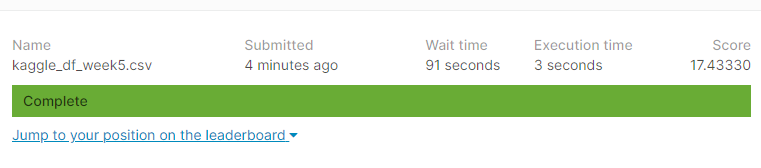

In [16]:
from IPython.display import Image
Image(filename='sub_5.jpg', width=1000)